<a href="https://colab.research.google.com/github/Masud690/lane-detection-app/blob/main/car_lane__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow



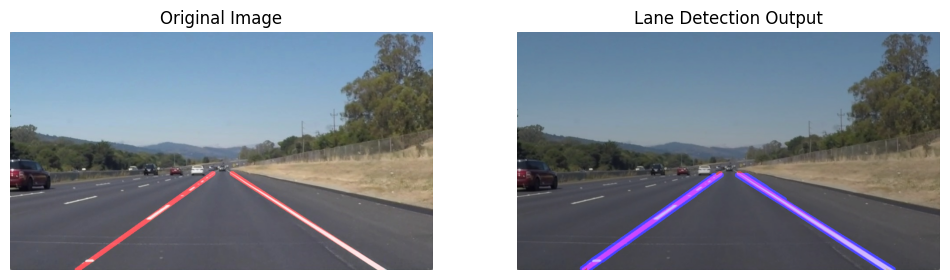

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    # Define a trapezoid mask for lane area (adjust if needed)
    polygons = np.array([
        [(int(0.1*width), height),
         (int(0.45*width), int(0.6*height)),
         (int(0.55*width), int(0.6*height)),
         (int(0.9*width), height)]
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_img

def lane_detection_pipeline(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    cropped = region_of_interest(edges)
    lines = cv2.HoughLinesP(cropped, 2, np.pi/180, 50, np.array([]), minLineLength=40, maxLineGap=100)
    line_img = draw_lines(image, lines)
    combo = cv2.addWeighted(image, 0.8, line_img, 1, 1)
    return combo

def main():
    # Change the filename here to your image
    image_path = '/content/laneLines_thirdPass.jpg'

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or path is incorrect.")
        return

    # Process image
    output = lane_detection_pipeline(image)

    # Convert to RGB for displaying with matplotlib
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Show original and result
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Lane Detection Output")
    plt.imshow(output_rgb)
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


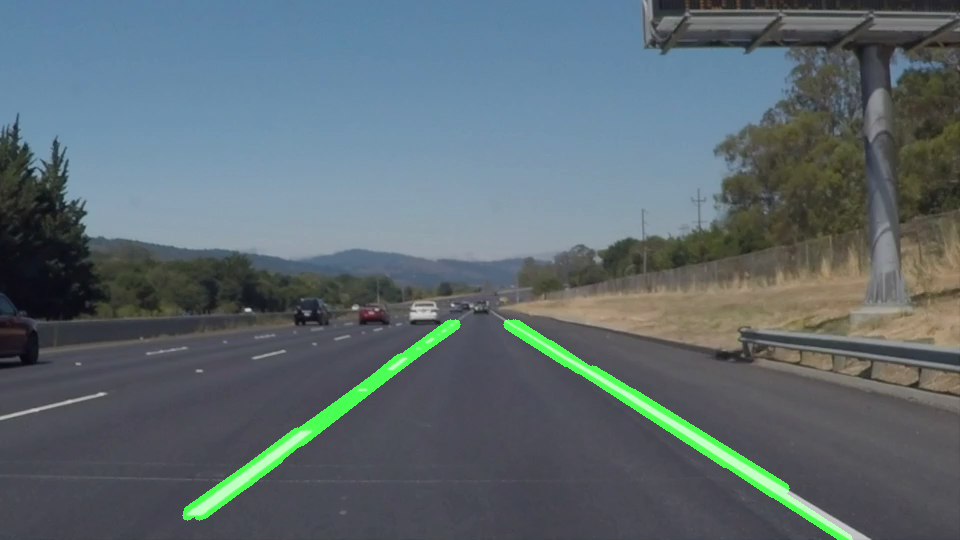

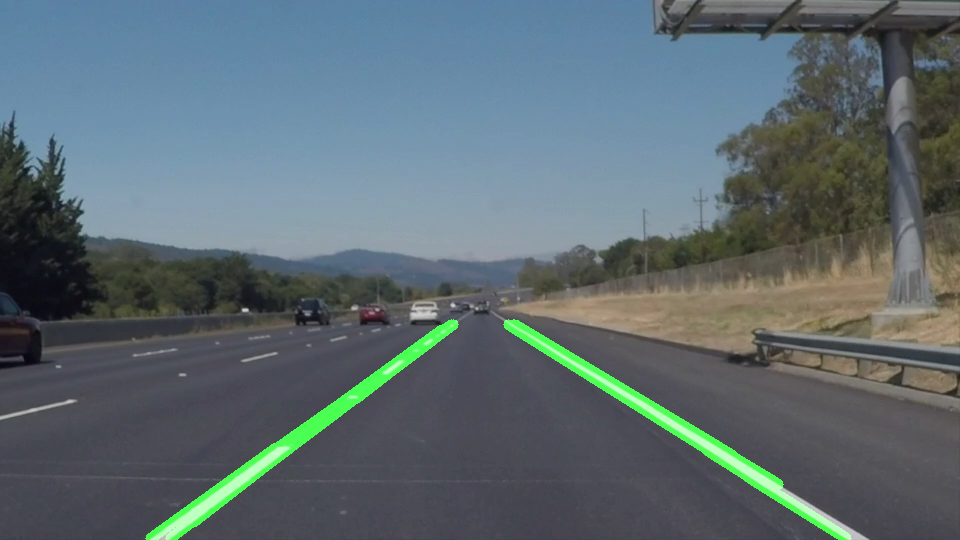

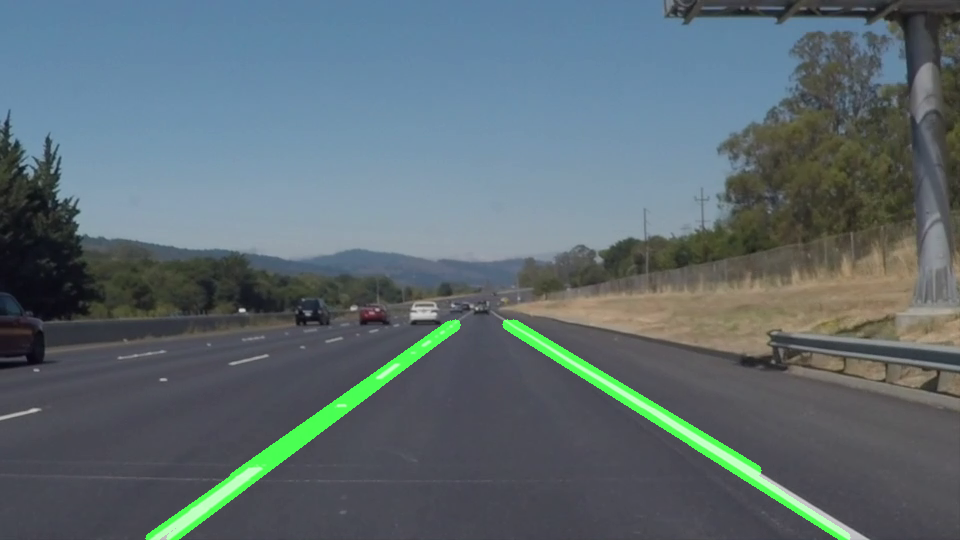

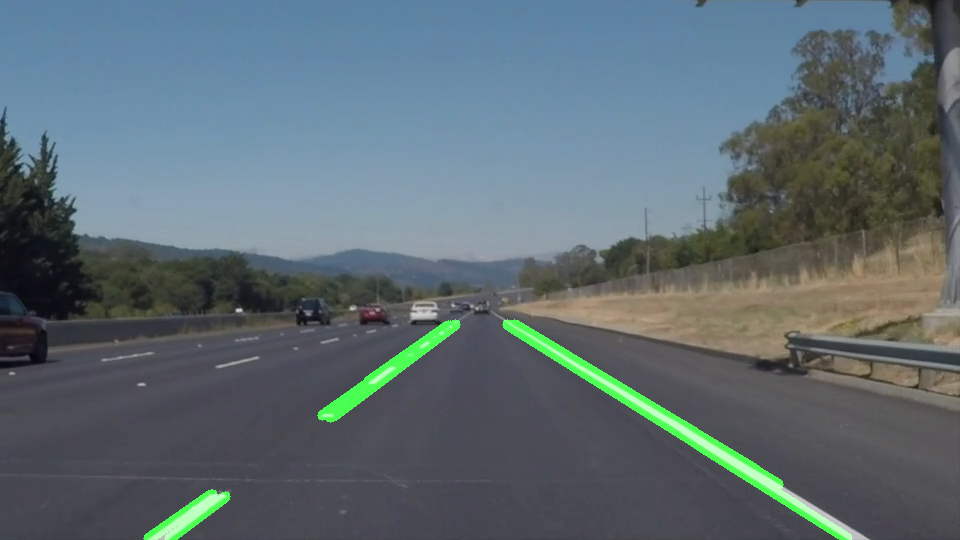

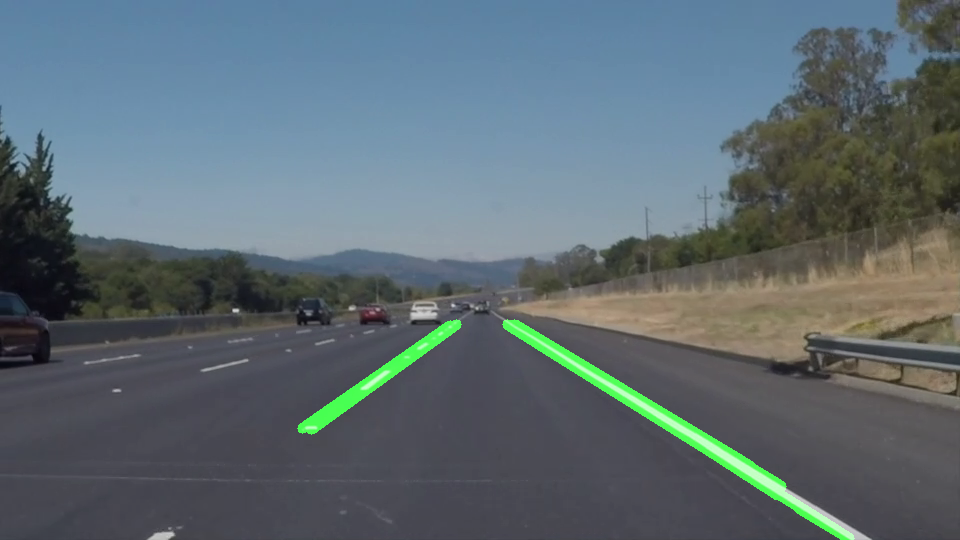

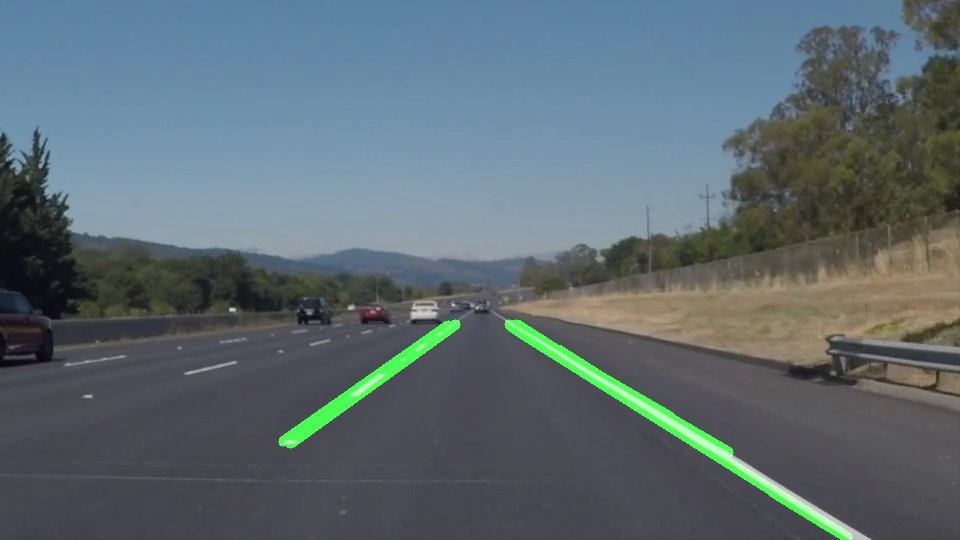

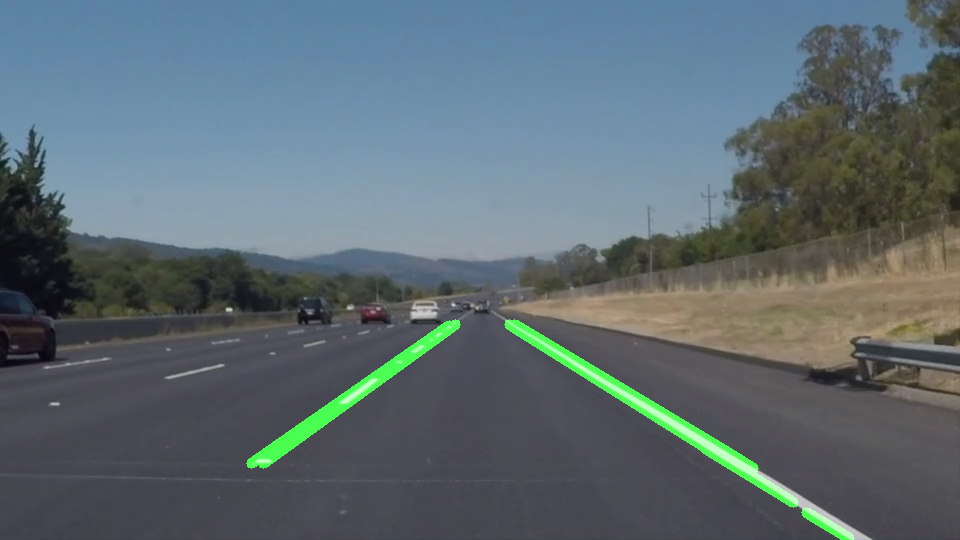

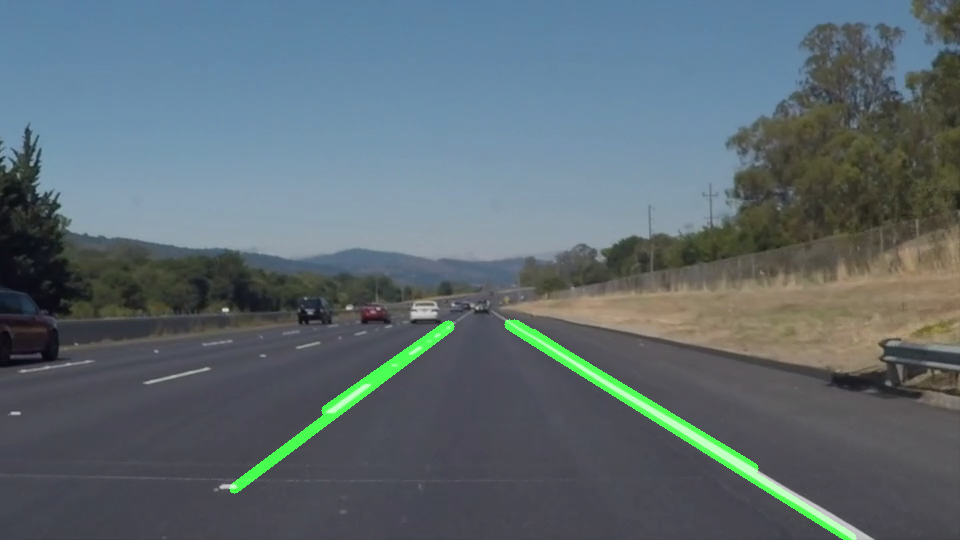

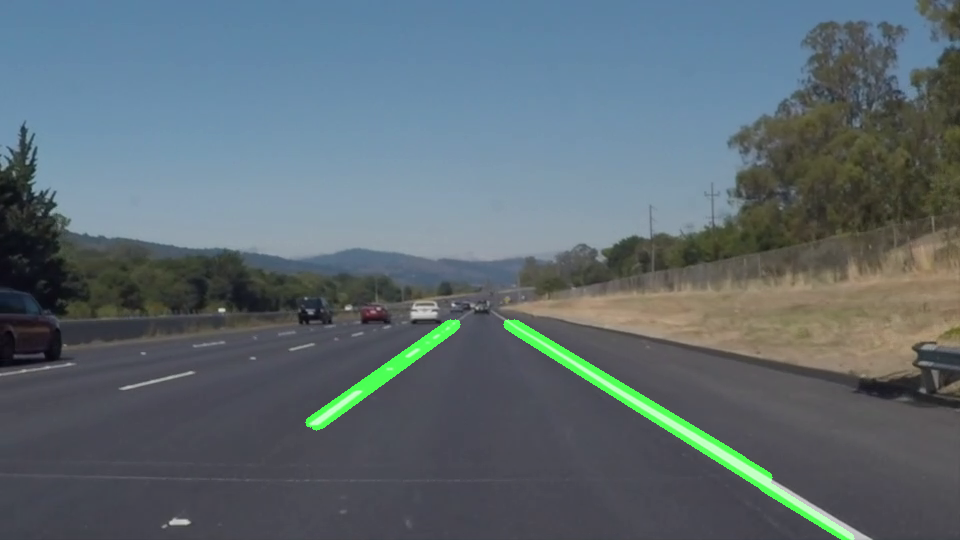

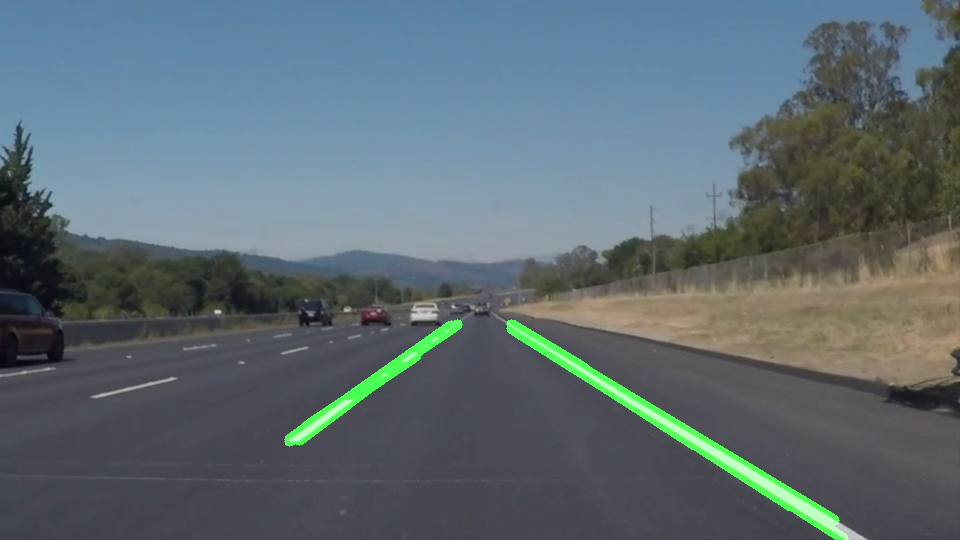

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    polygons = np.array([[
        (int(0.1 * width), height),
        (int(0.45 * width), int(0.6 * height)),
        (int(0.55 * width), int(0.6 * height)),
        (int(0.9 * width), height)
    ]])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 10)
    return line_img

def lane_detection_pipeline(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    cropped_edges = region_of_interest(edges)
    lines = cv2.HoughLinesP(cropped_edges, rho=2, theta=np.pi / 180, threshold=50, minLineLength=40, maxLineGap=100)
    line_img = draw_lines(frame, lines)
    combo = cv2.addWeighted(frame, 0.8, line_img, 1, 1)
    return combo

# Read and display a few frames from uploaded video
cap = cv2.VideoCapture('/content/solidWhiteRight.mp4')
frame_count = 0

while cap.isOpened() and frame_count < 10:  # Limit to 10 frames for display
    ret, frame = cap.read()
    if not ret:
        break
    output = lane_detection_pipeline(frame)
    cv2_imshow(output)
    frame_count += 1

cap.release()


In [ ]:
# Open the input video
input_path = '/content/solidWhiteRight.mp4'
cap = cv2.VideoCapture(input_path)

# Get frame dimensions and FPS
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = int(cap.get(cv2.CAP_PROP_FPS))

# Define output video writer
output_path = 'output_lanes.avi'
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    result = lane_detection_pipeline(frame)
    out.write(result)

cap.release()
out.release()
print("✅ Video saved as 'output_lanes.avi'")


✅ Video saved as 'output_lanes.avi'


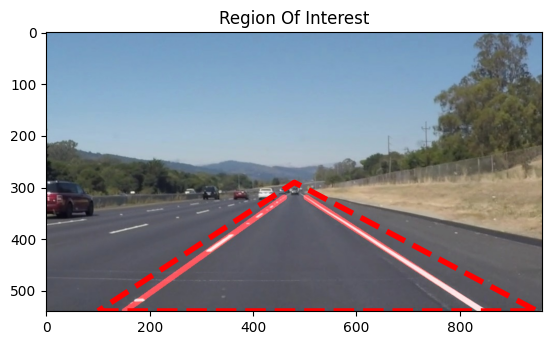

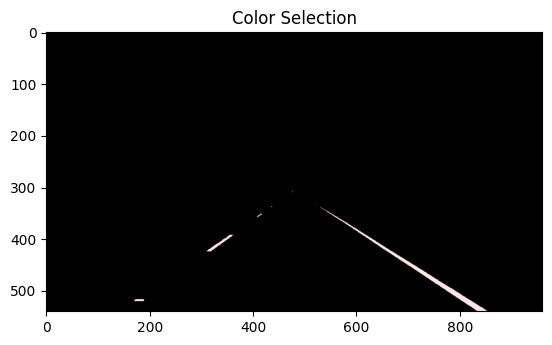

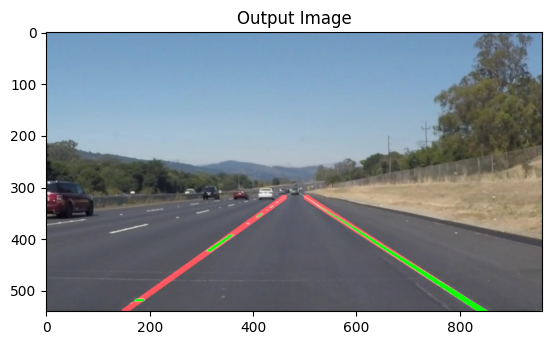

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('/content/laneLines_thirdPass.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()